# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
def dice_throw(n):
    return pd.DataFrame(np.array([random.choice(np.arange(1, 7, 1)) for i in range(n)]))

#### 2.- Plot the results sorted by value.

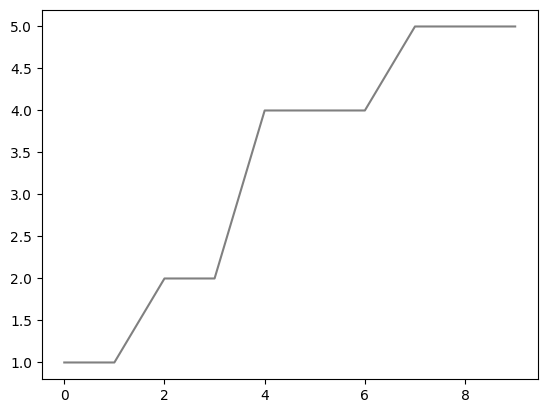

In [5]:
dice = dice_throw(10).sort_values(by=0).reset_index()[0]

# plot ??? like a line ??? OK.
plt.plot(range(len(dice)), dice, color= 'gray')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([2., 2., 0., 3., 3., 0.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

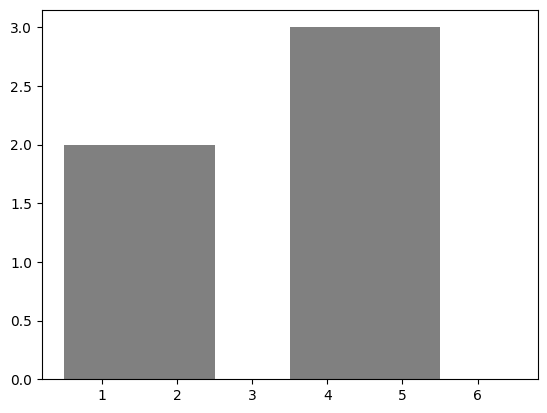

In [6]:
plt.hist(dice, bins= 6, range=(0.5, 6.5), color= 'gray')

In [ ]:
"""
They're both growing in y, but we can see the steps more clearly in the first plot
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def average(data):
    return sum(data)/len(data)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def freq(vals):
   
    freq_dist = {}
    for x in vals:
        if x in freq_dist:
            freq_dist[x] += 1
        else:
            freq_dist[x] = 1
            
    return freq_dist, sum([k*v for k, v in freq_dist.items()])/sum([v for k, v in freq_dist.items()])

freq_dist, mean_from_freq = freq(dice)

print(mean_from_freq)
print(np.mean(dice))

3.3
3.3


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
def median(val):
    
    """
    Input: list of values
    Ouput: median value of input list
    """
    
    if len(val) % 2 == 0:
        return sum(val[int(len(val)/2)-1:int(len(val)/2)+1])/2
    
    else:
        return val[int(len(val)/2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
def quartiles(vals):
    
    half = median(vals)
    
    if len(vals) % 2 == 0:
        first_quartile = median(vals[:int(len(vals)/2)])
        third_quartile = median(vals[int(len(vals)/2):])
    
    else:
        first_quartile = median(vals[:int(len(vals)/2)-1])
        third_quartile = median(vals[int(len(vals)/2)+1:])
    
    return first_quartile, half, third_quartile

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

(array([12., 17., 14., 22., 12., 23.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

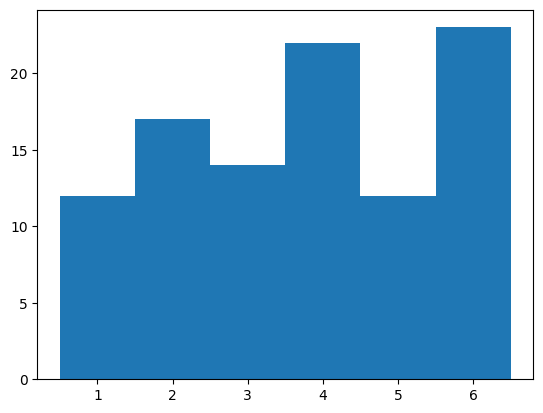

In [17]:
dice_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_values = sorted(dice_df['value'])
plt.hist(dice_values, bins=6, range= (0.5, 6.5))

In [ ]:
"""
The random throws of dice. Since there is only one die being thrown, there should be no visual correlation, as opposed of throwing two dice (the pyramid)
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [19]:
print(average(dice_values))
print(quartiles(dice_values))

3.74
(2.0, 4.0, 5.0)


#### 3.- Now, calculate the frequency distribution.


In [20]:
freq_dist = freq(dice_values)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

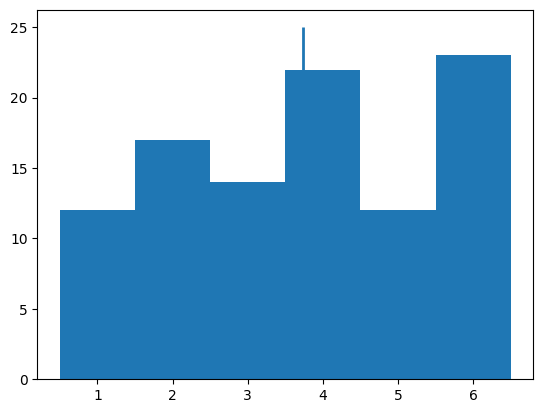

In [21]:
plt.hist(dice_values, bins=6, range= (0.5, 6.5))
plt.vlines(dice_df['value'].mean(), ymin=0, ymax=25, lw=2)

In [23]:
"""
It's the mean, almost the median, a little to the right
"""

"\nIt's the mean, almost the median, a little to the right\n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175., 167., 175., 168., 149., 166.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

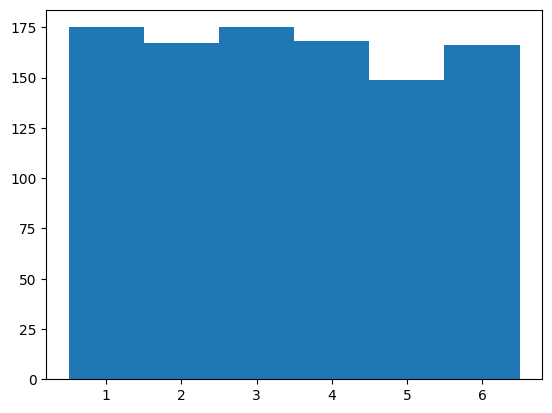

In [24]:
thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
plt.hist(thousand['value'], bins= 6, range= (0.5, 6.5))

In [ ]:
"""
Since the number of throws is much higher, the values of the plots are more normalized because there is less chance for extremes to happen.
That is why in clinical trials a bigger population yields better results with less bias.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

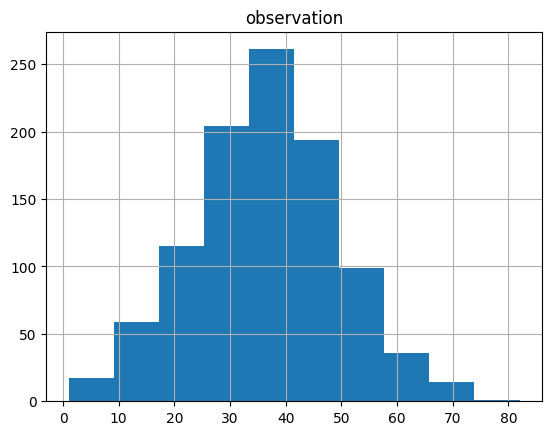

In [25]:
ages1 = pd.read_csv('../data/ages_population.csv')
ages1.hist()

In [27]:
# Between 30-40 for the mean and 2 for the deviation

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [28]:
print(ages1.observation.mean())
print(ages1.observation.std())

36.56
12.816499625976762


In [ ]:
"""
More or less 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

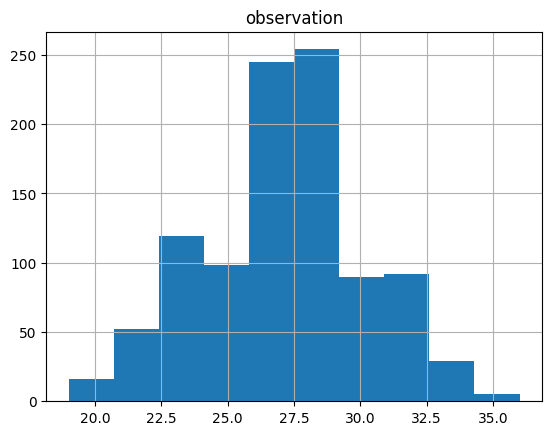

In [29]:
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [31]:
"""
That there is a much higher number of young people than before, and the population criteria is stricter,
since here it goes from around 18-37 and before 0-75
"""

'\nThat there is a much higher number of young people than before, and the population criteria is stricter,\nsince here it goes from around 18-37 and before 0-75\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [32]:
print(ages2.observation.mean())
print(ages2.observation.std())

27.155
2.969813932689186


In [ ]:
"""
As we could see for the plot, most of the people were young, around 27,5, and since most of them were in that age, the deviation is very little
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

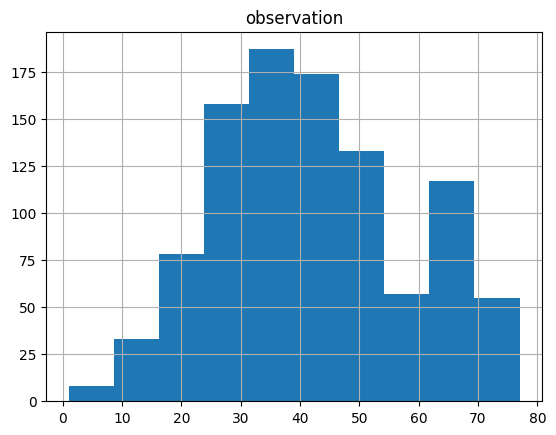

In [33]:
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [34]:
print(ages3.observation.mean())
print(ages3.observation.std())

41.989
16.144705959865934


In [ ]:
"""
That they went to a nursing home to conduct the survey, so there is a lot of old people living there, and then the younger staff (admins, nurses...)
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [36]:
print(ages3.observation.quantile(.25))
print(ages3.observation.quantile(.50))
print(ages3.observation.quantile(.75))

30.0
40.0
53.0


In [ ]:
"""
Don't know how to relate it to the plot, I'm dumb. That the 3th quartile is larger because of that decrease before 65 years?
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# Sorry, I don't know which ones to use

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""